## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:\\Users\\Cemen\\OneDrive\\Documents\\GitHub\\Matplotlib\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Cemen\\OneDrive\\Documents\\GitHub\\Matplotlib\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseCombine= pd.merge(mouse_metadata, study_results,how='outer', on="Mouse ID")
# Display the data table for preview
MouseCombine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
TotalMice = MouseCombine["Mouse ID"].value_counts()
Mice = len(TotalMice)
Mice

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice =MouseCombine[MouseCombine.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice_id = duplicated_mice["Mouse ID"].unique()
duplicated_mice_id

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = MouseCombine[MouseCombine.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanDF= MouseCombine.loc[MouseCombine["Mouse ID"] != "g989",:]
CleanDF.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice in the clean DataFrame.
CleanMice = CleanDF["Mouse ID"].value_counts()
CleanMice = len(CleanMice)
CleanMice


248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
RegimenMean = CleanDF.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
RegimenMean

RegimenMedian = CleanDF.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
RegimenMedian

RegimenVar = CleanDF.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
RegimenVar

RegimenStd = CleanDF.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
RegimenStd

RegimenSEM = CleanDF.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
RegimenSEM

Summary= pd.DataFrame({"Mean": RegimenMean, "Median": RegimenMedian, "Variance":RegimenVar, "Standard Deviation": RegimenStd, "SEM": RegimenSEM})
Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
AggSummary = CleanDF.groupby('Drug Regimen')
Summary2 = AggSummary.agg(['mean','median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
Summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

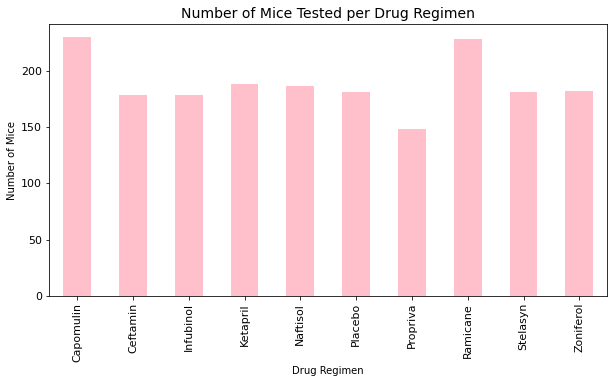

In [42]:
bar_plot =CleanDF.groupby('Drug Regimen').count()['Mouse ID']
bar_plot.plot.bar(figsize = (10,5), color = 'pink', fontsize = 11)


plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Drug Regimen", fontsize = 14)
plt.show()


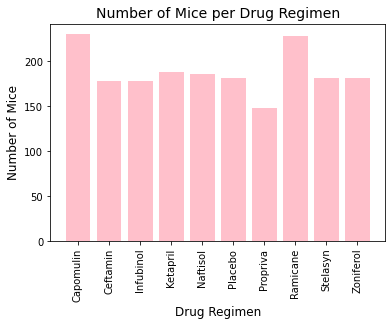

In [59]:
bar_plot.tolist()

#Set the x_axis 
x_axis = np.arange(len(bar_plot))
x_axis = bar_plot.index

plt.bar(x_axis, bar_plot, color = 'pink')

# Format bar chart
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Number of Mice per Drug Regimen", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

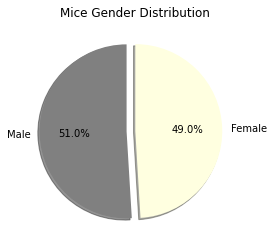

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drop_duplicate = MouseCombine[MouseCombine["Mouse ID"].isin(duplicated_mice_id) == False]
gender = drop_duplicate['Sex'].value_counts()
sizes = gender.values 
labels = gender.values
gender.plot(kind="pie", colors = ['gray', 'lightyellow'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

 
plt.title("Mice Gender Distribution")
plt.ylabel(" ")
plt.show()

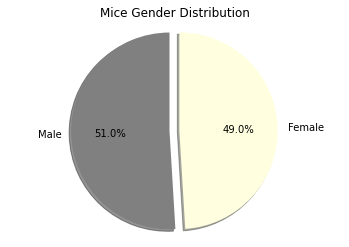

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
PyplotPie= drop_duplicate['Sex'].value_counts()


plt.pie(PyplotPie, labels = ["Male", "Female"], colors = ['gray', 'lightyellow'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

# Add title to chart, then display 
plt.title("Mice Gender Distribution")
plt.axis('equal')
plt.show()



In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
